<a href="https://colab.research.google.com/github/herreraskarina/Exercises/blob/main/GitHub_Master_Factor_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory factor analysis

Dataset: [ifood](https://www.kaggle.com/datasets/jackdaoud/marketing-data)

## Activity 1: Import the data and check for missing data. If there are missing data, make the appropriate treatments.

Factor analysis is based on the following assumptions:

* **Variables must be correlated with each other;** (checked in activity 3)

* **Use only continuous quantitative variables;** (checked in activity 2)

* **Existence of more observations than variables;** (checked in activity 1)

* **Data without outliers.** (checked in activity 1)

In [62]:
# importing data
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
# creating dataset
df = pd.read_excel('/content/drive/MyDrive/ifood2 - base.xlsx')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ID,ano_nascimento,nivel_educacao,estado_civil,renda_mensal,num_filhos_pequenos,num_filhos_adolescentes,num_dias_primeira_compra,num_dias_ultima_compra,gasto_vinho_ult_2anos,...,gasto_prod_carne_ult_2anos,gasto_prod_peixe_ult_2anos,gasto_prod_doces_ulti_2anos,qtde_compras_desconto,qtde_compras_web_restaurante,qtde_compras_catalogo,qtde_compras_loja,qtde_vistas_web_ult_mes,aceitou_qtde_oferta,reclamou_ult_2anos
0,6862,1971,graduado,divorciado,650.38,0,0,42,65,1,...,3,1,1,15,0,0,0,20,0,0
1,5376,1979,graduado,casado,919.92,1,0,539,42,1,...,1725,1,1,15,0,28,0,1,0,0
2,11110,1973,graduado,solteiro,1316.54,1,0,442,56,2,...,1,0,0,0,0,0,0,14,0,0
3,9931,1963,doutorado,casado,1512.41,1,1,6,29,5,...,1,1,1,15,0,0,0,19,0,0
4,10311,1969,graduado,casado,1664.66,0,1,267,0,16,...,12,2,4,0,25,0,0,1,0,0


In [63]:
# checking basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2236 entries, 0 to 2235
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            2236 non-null   int64  
 1   ano_nascimento                2236 non-null   int64  
 2   nivel_educacao                2236 non-null   object 
 3   estado_civil                  2236 non-null   object 
 4   renda_mensal                  2236 non-null   float64
 5   num_filhos_pequenos           2236 non-null   int64  
 6   num_filhos_adolescentes       2236 non-null   int64  
 7   num_dias_primeira_compra      2236 non-null   int64  
 8   num_dias_ultima_compra        2236 non-null   int64  
 9   gasto_vinho_ult_2anos         2236 non-null   int64  
 10  gasto_prod_frutas_ult_2anos   2236 non-null   int64  
 11  gasto_prod_carne_ult_2anos    2236 non-null   int64  
 12  gasto_prod_peixe_ult_2anos    2236 non-null   int64  
 13  gas

In [64]:
# checking how much null data there is in the dataset
df.isna().sum()

ID                              0
ano_nascimento                  0
nivel_educacao                  0
estado_civil                    0
renda_mensal                    0
num_filhos_pequenos             0
num_filhos_adolescentes         0
num_dias_primeira_compra        0
num_dias_ultima_compra          0
gasto_vinho_ult_2anos           0
gasto_prod_frutas_ult_2anos     0
gasto_prod_carne_ult_2anos      0
gasto_prod_peixe_ult_2anos      0
gasto_prod_doces_ulti_2anos     0
qtde_compras_desconto           0
qtde_compras_web_restaurante    0
qtde_compras_catalogo           0
qtde_compras_loja               0
qtde_vistas_web_ult_mes         0
aceitou_qtde_oferta             0
reclamou_ult_2anos              0
dtype: int64

In [65]:
# changing variables names to English
df.rename(columns={'ano_nascimento': 'birth_year',
                   'nivel_educacao': 'education',
                   'estado_civil': 'marital_status',
                   'renda_mensal': 'income',
                   'num_filhos_pequenos': 'children_no',
                   'num_filhos_adolescentes': 'teenager_no',
                   'num_dias_primeira_compra': 'first_purchase_days',
                   'num_dias_ultima_compra': 'last_purchase_days',
                   'gasto_vinho_ult_2anos': 'wine_purchase_last_2y',
                   'gasto_prod_frutas_ult_2anos': 'fruits_purchase_last_2y',
                   'gasto_prod_carne_ult_2anos': 'meat_purchase_last_2y',
                   'gasto_prod_peixe_ult_2anos': 'fish_purchase_last_2y',
                   'gasto_prod_doces_ulti_2anos': 'candy_purchase_last_2y',
                   'qtde_compras_desconto': 'discount_purchase',
                   'qtde_compras_web_restaurante': 'web_purchase',
                   'qtde_compras_catalogo': 'catalog_purchase',
                   'qtde_compras_loja': 'store_purchase',
                   'qtde_vistas_web_ult_mes': 'web_visits_last_month',
                   'aceitou_qtde_oferta': 'deal_purchase',
                   'reclamou_ult_2anos': 'complaints_last_2y'}, inplace=True)

**Comments**:
  

* There is no null data.
* Variables education and status_marital are not quantitative.
* Considering that one of the assumptions of factor analysis is the absence of outliers, it is important to observe whether there are outliers in the data and remove them.

In [66]:
# looking for outliers using .describe
df.describe()

,ID,birth_year,income,children_no,teenager_no,first_purchase_days,last_purchase_days,wine_purchase_last_2y,fruits_purchase_last_2y,meat_purchase_last_2y,fish_purchase_last_2y,candy_purchase_last_2y,discount_purchase,web_purchase,catalog_purchase,store_purchase,web_visits_last_month,deal_purchase,complaints_last_2y
count,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000
mean,5591.551878,1968.796512,19632.809070,0.444991,0.506261,353.335868,49.147138,303.873435,26.271020,166.924419,37.405188,27.081395,2.322898,4.082737,2.659213,5.789356,5.317531,0.445886,0.009392
std,3245.240106,11.980604,9442.935676,0.538551,0.544615,202.064179,28.954880,336.876776,39.761356,225.778550,54.436749,41.300943,1.932052,2.779736,2.920752,3.253756,2.424756,0.889524,0.096477
min,0.000000,1893.000000,650.380000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,13245.680000,0.000000,0.000000,180.750000,24.000000,23.000000,1.000000,16.000000,3.000000,1.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,5458.500000,1970.000000,19286.090000,0.000000,0.000000,355.000000,49.000000,173.000000,8.000000,67.000000,12.000000,8.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,8427.750000,1977.000000,25739.940000,1.000000,1.000000,528.000000,74.000000,505.000000,33.000000,232.000000,50.000000,33.000000,3.000000,6.000000,4.000000,8.000000,7.000000,1.000000,0.000000
max,11191.000000,1996.000000,250626.320000,2.000000,2.000000,699.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,15.000000,27.000000,28.000000,13.000000,20.000000,5.000000,1.000000


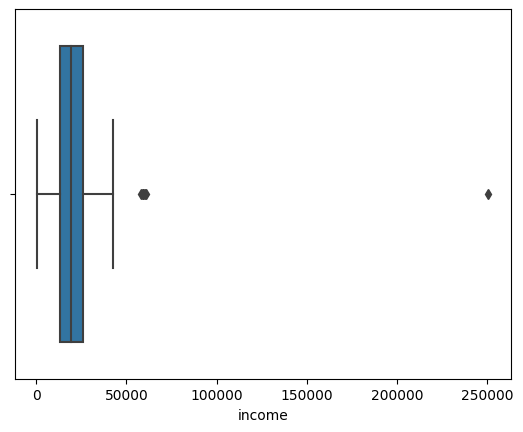

In [67]:
# using boxplot to identify outliers in the variable income
import seaborn as sns
sns.boxplot(x=df['income']);

In [68]:
# deleting identified outliers
df = df[df['income'] < 50000.000000]

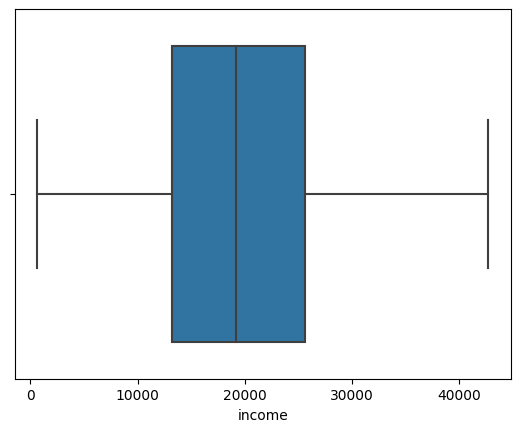

In [69]:
sns.boxplot(x=df['income']);

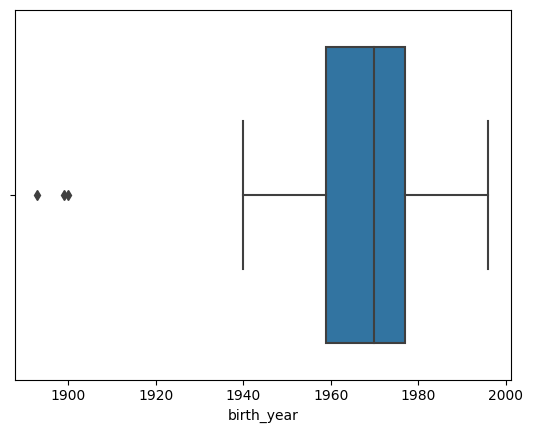

In [70]:
sns.boxplot(x=df['birth_year']);

In [71]:
# removing outliers (e.g., people over 100 yo)
df = df[df['birth_year'] > 1930]

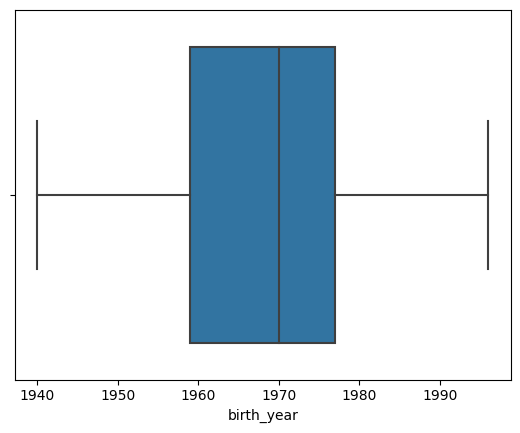

In [72]:
sns.boxplot(x=df['birth_year']);

In [73]:
df.describe()

,ID,birth_year,income,children_no,teenager_no,first_purchase_days,last_purchase_days,wine_purchase_last_2y,fruits_purchase_last_2y,meat_purchase_last_2y,fish_purchase_last_2y,candy_purchase_last_2y,discount_purchase,web_purchase,catalog_purchase,store_purchase,web_visits_last_month,deal_purchase,complaints_last_2y
count,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000
mean,5588.680000,1968.879551,19399.855784,0.445393,0.507416,353.530337,49.144270,304.930787,26.317303,165.255281,37.521798,27.180225,2.317753,4.097978,2.633708,5.811685,5.335281,0.447640,0.008989
std,3243.406786,11.703427,7778.158239,0.538790,0.544812,202.190580,28.938836,337.043060,39.751940,219.390081,54.508007,41.359522,1.894989,2.776494,2.793433,3.244953,2.413045,0.891141,0.094403
min,0.000000,1940.000000,650.380000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2829.000000,1959.000000,13224.810000,0.000000,0.000000,181.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,5455.000000,1970.000000,19228.570000,0.000000,0.000000,355.000000,50.000000,175.000000,8.000000,67.000000,12.000000,8.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,8420.000000,1977.000000,25619.550000,1.000000,1.000000,529.000000,74.000000,505.000000,33.000000,231.000000,50.000000,34.000000,3.000000,6.000000,4.000000,8.000000,7.000000,1.000000,0.000000
max,11191.000000,1996.000000,42757.140000,2.000000,2.000000,699.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,15.000000,27.000000,28.000000,13.000000,20.000000,5.000000,1.000000


**Note**: 10 rows have been removed from the dataset.

## Activity 2: Perform data preparation, i.e., eliminate irrelevant columns.

In [74]:
# observing which columns can be deleted or transformed
df.head()

,ID,birth_year,education,marital_status,income,children_no,teenager_no,first_purchase_days,last_purchase_days,wine_purchase_last_2y,...,meat_purchase_last_2y,fish_purchase_last_2y,candy_purchase_last_2y,discount_purchase,web_purchase,catalog_purchase,store_purchase,web_visits_last_month,deal_purchase,complaints_last_2y
0,6862,1971,graduado,divorciado,650.38,0,0,42,65,1,...,3,1,1,15,0,0,0,20,0,0
1,5376,1979,graduado,casado,919.92,1,0,539,42,1,...,1725,1,1,15,0,28,0,1,0,0
2,11110,1973,graduado,solteiro,1316.54,1,0,442,56,2,...,1,0,0,0,0,0,0,14,0,0
3,9931,1963,doutorado,casado,1512.41,1,1,6,29,5,...,1,1,1,15,0,0,0,19,0,0
4,10311,1969,graduado,casado,1664.66,0,1,267,0,16,...,12,2,4,0,25,0,0,1,0,0


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2225 entries, 0 to 2235
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       2225 non-null   int64  
 1   birth_year               2225 non-null   int64  
 2   education                2225 non-null   object 
 3   marital_status           2225 non-null   object 
 4   income                   2225 non-null   float64
 5   children_no              2225 non-null   int64  
 6   teenager_no              2225 non-null   int64  
 7   first_purchase_days      2225 non-null   int64  
 8   last_purchase_days       2225 non-null   int64  
 9   wine_purchase_last_2y    2225 non-null   int64  
 10  fruits_purchase_last_2y  2225 non-null   int64  
 11  meat_purchase_last_2y    2225 non-null   int64  
 12  fish_purchase_last_2y    2225 non-null   int64  
 13  candy_purchase_last_2y   2225 non-null   int64  
 14  discount_purchase       

In [76]:
# checking which variables are binary
df.deal_purchase.unique()

array([0, 1, 2, 3, 4, 5])

In [77]:
df.complaints_last_2y.unique()

array([0, 1])

In [78]:
# checking how many values there are in education
df.education.unique()

array(['graduado', 'doutorado', 'mestrado', 'ensino_medio', 'pos'],
      dtype=object)

**Comments**:
  

* Variable education can be transformed, as an ordinal structure can be identified (ensino_medio: 1, graduado: 2, pos: 3, mestrado: 4, doutorado: 5)
* Variable ID can be deleted because it is categorical (despite containing numbers). ID can be used in the last step of this analysis, therefor it should be saved in a separate dataset to be used later.
* Variable complaints_last_2y can be deleted as it is binary.
* Variable marital_status can be deleted because it is categorical and cannot be transformed like education.
* The group of variables related to puchases bring very similar information. It is possible to turn all these variables into a single one.

In [79]:
# replacing the categories of variable education
df['education'] = df['education'].replace('ensino_medio', 1)
df['education'] = df['education'].replace('graduado', 2)
df['education'] = df['education'].replace('pos', 3)
df['education'] = df['education'].replace('mestrado', 4)
df['education'] = df['education'].replace('doutorado', 5)

# verifying the new values
df.education.unique()

array([2, 5, 4, 1, 3])

In [80]:
# merging the purchase variables into a single one
df['total_purchases'] = df['wine_purchase_last_2y'] + df['fruits_purchase_last_2y'] + df['meat_purchase_last_2y'] + df['fish_purchase_last_2y'] + df['candy_purchase_last_2y']

In [81]:
# dropping irrelevant variables for the analysis
df.drop('wine_purchase_last_2y', axis=1, inplace=True)
df.drop('fruits_purchase_last_2y', axis=1, inplace=True)
df.drop('meat_purchase_last_2y', axis=1, inplace=True)
df.drop('fish_purchase_last_2y', axis=1, inplace=True)
df.drop('candy_purchase_last_2y', axis=1, inplace=True)
df.drop('marital_status', axis=1, inplace=True)
df.drop('complaints_last_2y', axis=1, inplace=True)

In [82]:
# saving ID variable for later
df_final = df.copy()

In [85]:
# dropping IDfor the analysis
df.drop('ID', axis=1, inplace=True)

In [86]:
df.head()

,birth_year,education,income,children_no,teenager_no,first_purchase_days,last_purchase_days,discount_purchase,web_purchase,catalog_purchase,store_purchase,web_visits_last_month,deal_purchase,total_purchases
0,1971,2,650.38,0,0,42,65,15,0,0,0,20,0,7
1,1979,2,919.92,1,0,539,42,15,0,28,0,1,0,1729
2,1973,2,1316.54,1,0,442,56,0,0,0,0,14,0,4
3,1963,5,1512.41,1,1,6,29,15,0,0,0,19,0,8
4,1969,2,1664.66,0,1,267,0,0,25,0,0,1,0,38


In [87]:
df_final.head()

,ID,birth_year,education,income,children_no,teenager_no,first_purchase_days,last_purchase_days,discount_purchase,web_purchase,catalog_purchase,store_purchase,web_visits_last_month,deal_purchase,total_purchases
0,6862,1971,2,650.38,0,0,42,65,15,0,0,0,20,0,7
1,5376,1979,2,919.92,1,0,539,42,15,0,28,0,1,0,1729
2,11110,1973,2,1316.54,1,0,442,56,0,0,0,0,14,0,4
3,9931,1963,5,1512.41,1,1,6,29,15,0,0,0,19,0,8
4,10311,1969,2,1664.66,0,1,267,0,0,25,0,0,1,0,38


## Activity 3: Turn the data into the same scale and plot a heatmap to observe the correlation.

In [88]:
# standardizing the data with StandardScaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[df_scaled.columns] = scaler.fit_transform(df_scaled)
df_scaled.head()

,birth_year,education,income,children_no,teenager_no,first_purchase_days,last_purchase_days,discount_purchase,web_purchase,catalog_purchase,store_purchase,web_visits_last_month,deal_purchase,total_purchases
0,0.181223,-0.817583,-2.411071,-0.826841,-0.931569,-1.541122,0.548028,6.694021,-1.476286,-0.943033,-1.791395,6.078632,-0.502436,-0.962838
1,0.864937,-0.817583,-2.376410,1.029587,-0.931569,0.917507,-0.246930,6.694021,-1.476286,9.082728,-1.791395,-1.797005,-0.502436,2.028845
2,0.352151,-0.817583,-2.325407,1.029587,-0.931569,0.437654,0.236957,-1.223370,-1.476286,-0.943033,-1.791395,3.591589,-0.502436,-0.968050
3,-0.502491,1.534731,-2.300219,1.029587,0.904340,-1.719212,-0.696255,6.694021,-1.476286,-0.943033,-1.791395,5.664125,-0.502436,-0.961101
4,0.010294,-0.817583,-2.280640,-0.826841,0.904340,-0.428060,-1.698593,-1.223370,7.529898,-0.943033,-1.791395,-1.797005,-0.502436,-0.908981


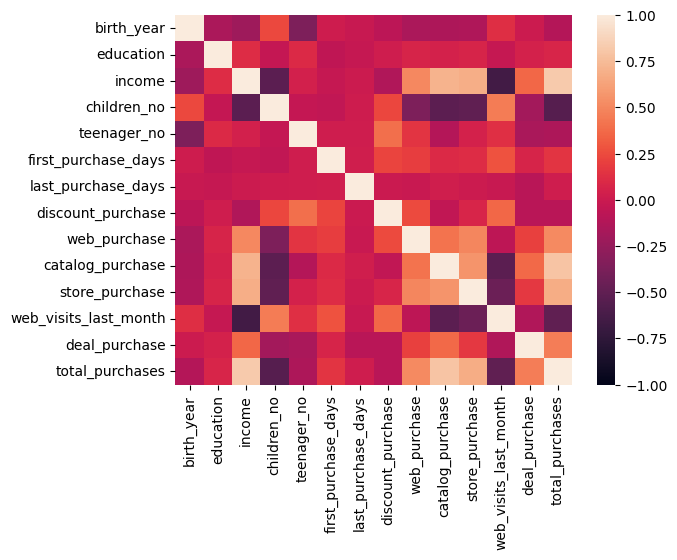

In [89]:
# ploting heatmap
sns.heatmap(df_scaled.corr(), vmin=-1, vmax=1, annot=False);

## Activity 5: Perform Bartlett's sphericity test to determine whether the variables are correlated.

To perform this test in `Python` we use the `calculate_bartlett_sphericity` function from the `factor_analyzer` package. This package is not installed by default! To install it use the `!pip install factor_analyzer` command.

The function we want is in the `factor_analyzer` package inside the `factor_analyzer` module.

This function will return two values: the chi-square statistic of the test and the p-value. We will consider a **significance level of 5%**.

In [90]:
# installing the factor_analyzer package
!pip install factor_analyzer

In [91]:
# importing the calculate_bartlett_sphericity function
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

# applying the test using the function
chi_square, p_value = calculate_bartlett_sphericity(df_scaled)
print(f"The test result is {chi_square} and its respective p-value is {p_value}")

The test result is 13484.005743043195 and its respective p-value is 0.0


**Comment**: As the **p value is less than 0.05** we can reject the null hypothesis, i.e., we can consider that **there is correlation** between all variables. Therefore, we can proceed with the factor analysis.

## Activity 6: Obtain the Kaiser-Meyer-Olkin measure and determine whether factor analysis is indicated.

Small KMO values indicate that the correlations between the pairs of variables cannot be explained by other variables, indicating that the factorial analysis is not adequate.
KMO always varies between 0 and 1, the higher the better. Results below 0.5 indicate that factor analysis is not adequate.

In [92]:
# importing the calculate_kmo function
from factor_analyzer.factor_analyzer import calculate_kmo

# calculating KMO measure
kmo_all, kmo_model = calculate_kmo(df_scaled)
print(f"The KMO value is {kmo_model}")

The KMO value is 0.7957040723489556


**Comment**: As the **KMO value is greater than 0.05** we can consider that **there is correlation** between all variables. Therefore, we can proceed with the factor analysis.

## Activity 7: Find the right number of factors for this problem.

We will use the `FactorAnalyzer` function and the `get_eigenvalues()` method applied to an object of the `FactorAnalyzer` class, after calculating data values.

The `get_eigenvalues()` method returns two objects, the first being the eigenvalues.

In [93]:
# importing the FactorAnalyzer function
from factor_analyzer import FactorAnalyzer

# creating an object to perform factor analysis
fa = FactorAnalyzer(rotation=None)

# applying factor analysis to the data
fa.fit(df_scaled)

# obtaining the eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([4.53925251, 1.91478704, 1.42142442, 1.0748146 , 0.94529474,
       0.84216705, 0.7777208 , 0.5930209 , 0.52876918, 0.41341043,
       0.37385379, 0.27296989, 0.19366397, 0.10885068])

**Comment**: To find the amount of factors, we look at the eigenvalues of the factor loading matrix. If the eigenvalue is greater than 1, then we consider that factor as relevant. There are 4 values greater than 1, so **we can consider 4 factors**. We can use the Scree Plot to better visualize the eigenvalues.

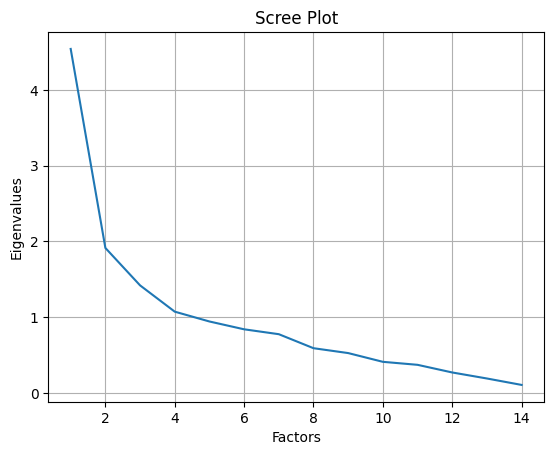

In [101]:
# importing matplotlib to make some customizations to the plot
import matplotlib.pyplot as plt

# creating a scree plot
sns.lineplot(x=range(1, df_scaled.shape[1]+1), y=ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalues')
plt.grid();

**Comment**: The plot shows that there are 4 factors greater than 1.

## Activity 8: Calculate the cumulative explained variance.

We will use the `get_factor_variance()` method applied to the objective used in the factorial analysis.

In [95]:
# creating an object to perform factor analysis with 4 factors
fa = FactorAnalyzer(n_factors=4, rotation=None)

# applying factor analysis to the data
fa.fit(df_scaled)

# creating name for the columns of the factorial loads DataFrame
colunas = []
for i in range(4):
  colunas.append('Fator ' + str(i))

# creating DataFrame to help visualize the result
variance_factor = pd.DataFrame(fa.get_factor_variance(),
                   index=['Variance','Proportional Variance','Cumulative Variance'],
                   columns=colunas)

variance_factor

,Fator 0,Fator 1,Fator 2,Fator 3
Variance,4.247467,1.453342,0.902702,0.361679
Proportional Variance,0.303391,0.103810,0.064479,0.025834
Cumulative Variance,0.303391,0.407201,0.471679,0.497514


**Comment**: The 4 factors can explain 49% of the data. We can use communality to see how much of each variable's variance can be explained by the factors.

In [102]:
pd.DataFrame(fa.get_communalities(),
             index=df_scaled.columns,
             columns=['Communalities'])

,Communalities
birth_year,0.276187
education,0.058570
income,0.839086
children_no,0.420294
teenager_no,0.684312
first_purchase_days,0.225372
last_purchase_days,0.013164
discount_purchase,0.453601
web_purchase,0.492519
catalog_purchase,0.662550


We can see that only the variables last_purchase_days and education have the lowest percentage, therefore they are the variables that are least explained by the factors.

## Activity 9: Rotate the factors.

As we are working with factors that influence customers, it is interesting not to have a very large number, so we will use 4 factors in the analysis below.

This process can be done by passing the parameters of interest to the `FactorAnalyzer()` function, which in our case are `n_factors` and `rotation='varimax`.

After exposing our object to the data, let's access the `loadinds_` attribute that has the factorial loads.

In [97]:
# performing factor analysis with rotation
fa = FactorAnalyzer(n_factors=4, rotation='varimax')
fa.fit(df_scaled)

# creating DataFrame of factorial loads
loads_fact = pd.DataFrame(fa.loadings_,
                          index=df_scaled.columns,
                          columns=colunas)
loads_fact

,Fator 0,Fator 1,Fator 2,Fator 3
birth_year,-0.154590,0.028417,-0.501472,0.002576
education,0.058308,-0.028916,0.210431,0.100266
income,0.879161,-0.131093,0.197568,0.099719
children_no,-0.620904,0.125902,-0.137201,-0.009843
teenager_no,-0.088534,0.229567,0.769184,-0.179246
first_purchase_days,0.094323,0.454043,-0.093347,0.040082
last_purchase_days,0.018391,0.004021,-0.011071,-0.112637
discount_purchase,-0.092971,0.600455,0.251612,-0.145267
web_purchase,0.548787,0.399649,0.176897,0.018443
catalog_purchase,0.801689,-0.011117,0.000373,0.140433


## Activity 10: Obtain the relationship of each factor to the variables it is influencing.

Factor loadings indicate how much a factor explains a variable. These values range from -1 to 1. The closer to -1 or 1, the more the factor explains the variable.

Let's establish a cutoff value to be able to understand which factors explain which variables. Let's assume that this cutoff value will be 0.5.

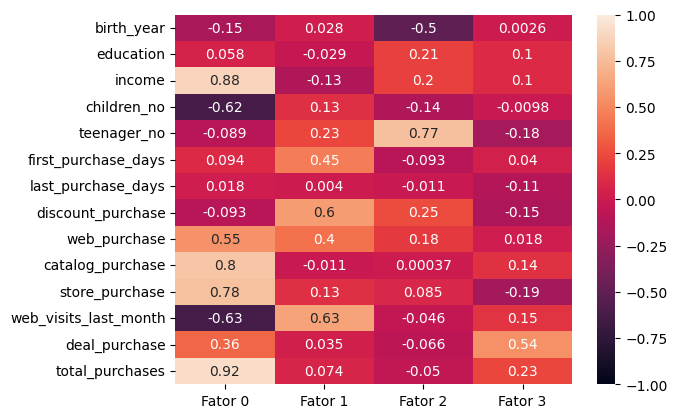

In [98]:
# observing the value of the factorial loads with heatmap
sns.heatmap(loads_fact, vmin=-1, vmax=1, annot=True);

In [99]:
# creating the dictionary
variable_factors = {}

# filling the dictionary
for i in range(4):
  variable_factors['Fator ' + str(i)] = loads_fact[abs(loads_fact.iloc[:,i]) > 0.5].iloc[:,i].index.tolist()

variable_factors

{'Fator 0': ['income',
  'children_no',
  'web_purchase',
  'catalog_purchase',
  'store_purchase',
  'web_visits_last_month',
  'total_purchases'],
 'Fator 1': ['discount_purchase', 'web_visits_last_month'],
 'Fator 2': ['birth_year', 'teenager_no'],
 'Fator 3': ['deal_purchase']}

## Activity 11: Find a name that represents each factor.

* Factor 0: Regular Customers

* Factor 1: Online Shopping

* Factor 2: Older Customers

* Factor 3: Deal Purchases